<center> <h1 style="color:#BF360C">RESULTADOS</h1></center>

In [1]:
import os
from skimage import io
import matplotlib as plt
import numpy as np
import pandas as pd
import base64
from IPython.display import display, Javascript
from IPython.display import display, HTML
from IPython.utils.py3compat import str_to_bytes, bytes_to_str

Se realizaron un total de 66 pruebas, 22 por cada nivel de ZOOM y 11 por cada configuracion de ZOOM.<br/>
**Ejemplo:** Para el ZOOM 13 COMPOUND se realizaron 11 pruebas, cada una variando parametros como el modelo, batch_size o epoch.

* Nieveles y Configuraciones de OVERLAECOBO:
    * 13_SIMPLE
    * 13_COMPOUND
    * 14_SIMPLE
    * 14_COMPOUND
    * 15_SIMPLE
    * 15_COMPOUND

In [2]:
PATH_PRUEBAS = "./Resultados"
pruebas = pd.read_csv(PATH_PRUEBAS+"/pruebas.csv")
pruebas

,PRUEBA,RED,EPOCH,BATCH_SIZE
0,1,FC-DenseNet56,50,1
1,2,FC-DenseNet56,70,1
2,3,Encoder-Decoder,70,1
3,4,Encoder-Decoder,70,2
4,5,Encoder-Decoder-Skip,70,1
5,6,Encoder-Decoder-Skip,70,2
6,7,FRRN-A,70,1
7,8,MobileUNet,70,1
8,9,MobileUNet,70,2
9,10,MobileUNet-Skip,70,1


<h2 style="color:#BF360C">SIGNIFICADO DE LAS METRICAS</h2>

* GT = Ground Truht
* pred = predction
* El framework en sus entrañas convierte las imagenes label RGB a imagenes de 1D usando el archivo class_dict.csv
<br/>
<br/>

<h3 style="color:#BF360C">TEST ACCURACY, AVG_ACCURACY</h3>

Realiza flatten a las imagenes (1D) pred y label, cuenta los pixeles iguales entre ambas y las divide en el numero total de pixeles. Esta metrica es poco confiable dado que la clase `No Definido` la memoriza exageradamente bien y las imagenes con muchos pixeles de esta clase los identifica muy bien, lo que le da un buen accyracy, pero la parte definida que es la que importa tiene un error muy grande. Por Ejemplo en el **ZOOM 15 COMPOUND PRUEBA 10** encontramos.

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/13_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/13_pred.png"/>
    </div>
    <p> <center><b>
    avg_accuracy:</b> 0.830719
     </center>
    </p>
</div>

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/1_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/1_pred.png"/>
    </div>
    <p> <center><b>
    avg_accuracy:</b> 0.296356
     </center>
    </p>
</div>
Para lo unico que indica esta metrica es la capacidad de las redes de identificar entre zona `Definida` y `No Definida`

**TEST ACCURACY ZOOM 15 COMPOUND PRUEBA 10:** 0.7025456746419271

<h3 style="color:#BF360C">AVERAGE PER CLASS</h3>

Realiza flatten de las imagen gt y pred de 1D y en un vector del tamaño de la cantidad de clases va llevando el conteo de las clases iguales en cada pixel de pred y gt. Esta metrica podria ser de utilidad ya que muestra que tan iguales son las clases de cada pixel. A tener en cuenta que cuando encuentra un pixel que no esta entre las clases pone un valor de 1.Por Ejemplo en el **ZOOM 15 COMPOUND PRUEBA 10** encontramos.
<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/28_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/28_pred.png"/>
    </div>
    <p> <center>
    <b> Estrato 1:</b> 0.001527 <br/>
    <b> Estrato 2:</b> 0.063591 <br/>
    <b> Estrato 3:</b> 0.758048 <br/>
    <b> Estrato 4:</b> 0.172945 <br/>
    <b> Estrato 5:</b> 0.033175 <br/>
    <b> Estrato 6:</b> 1.000000 <br/>
    <b> No Definido:</b> 0.995293 <br/>
     </center>
    </p>
</div>

**AVERAGE PER CLASS ZOOM 15 COMPOUND PRUEBA 10:**<br/>
**Estrato_1** = 0.511536<br/>
**Estrato_2** = 0.375952<br/>
**Estrato_3** = 0.724010<br/>
**Estrato_4** = 0.476454<br/>
**Estrato_5** = 0.211465<br/>
**Estrato_6** = 0.814390<br/>
**No_Definido** = 0.996134

In [92]:
sum([0.001527, 0.063591, 0.758048, 0.172945, 0.033175, 1.000000])/6

0.33821433333333334

In [95]:
sum([0.511536,0.375952,0.724010,0.476454,0.211465,0.814390])/6

0.5871344285714286

<h3 style="color:#BF360C"> AVERAGE PRECISION </h3>

Usa la metrica [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) de Scikit-learn, traduciendo en Google "La precisión es intuitivamente la capacidad del clasificador de no etiquetar como positivo a la muestra que es negativa". Por Ejemplo en el **ZOOM 15 COMPOUND PRUEBA 10** encontramos.

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/35_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/35_pred.png"/>
    </div>
    <p> <center><b>
    precision:</b>  0.985314
    </center>
    </p>
</div>

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/49_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/49_pred.png"/>
    </div>
    <p> <center><b>
    precision: </b>  0.214483
    </center>
    </p>
</div>

**AVERAGE PRECISION ZOOM 15 COMPOUND PRUEBA 10:** 0.7367920075919394

<h3 style="color:#BF360C"> AVERAGE RECALL </h3>

Usa metrica de [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) de Scikit-learn. Traduciendo con Google "es intuitivamente la habilidad del clasificador para encontrar todas las muestras positivas."  Por Ejemplo en el **ZOOM 15 COMPOUND PRUEBA 10** encontramos.

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/54_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/54_pred.png"/>
    </div>
    <p> <center><b>
    recall: </b>  0.973984
    </center>
    </p>
</div>

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/7_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/7_pred.png"/>
    </div>
    <p> <center><b>
    recall: </b>  0.227753
    </center>
    </p>
</div>

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/58_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/58_pred.png"/>
    </div>
    <p> <center><b>
    recall: </b>  0.527191
    </center>
    </p>
</div>

**AVERAGE RECALL ZOOM 15 COMPOUND PRUEBA 10:**  0.7025456746419271 

<h3 style="color:#BF360C"> AVERAGE F1 </h3>

Usa la metrica [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). traduciendo a lo Google "El puntaje F1 se puede interpretar como un promedio ponderado de la precisión y el recuerdo (recall)". por consiguiente pienso yo que si las dos anteriores no eran una metrica confiable, esta tampoco.

**AVERAGE F1 ZOOM 15 COMOUND PRUEBA 10:** 0.6923589626170131

<h3 style="color:#BF360C"> AVERAGE MEAN IoU </h3> 

Metrica recomendada por Raul, aunque en este framework hace el calculo a mano y no con algun framework. en [enlace](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) de su explicacion. una metrica muy sincera para mi proyecto dado que compara es que tan iguales con las imagenes de target y predict. pensaba que era bajita dado que la imagen target y la predict eran de distintos tamaños pero aca usa la imagen gt para compararla con la predict, las cuales son imagenes del mismo tamaño. sin embargo más adelante usaré la iou de sklearn para comprobar los resultados.

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/31_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/31_pred.png"/>
    </div>
    <p> <center><b>
    IoU: </b>  0.901335
    </center>
    </p>
</div>

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/3_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/3_pred.png"/>
    </div>
    <p> <center><b>
    IoU: </b>  0.599556
    </center>
    </p>
</div>

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/43_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_10/Val/43_pred.png"/>
    </div>
    <p> <center><b>
    IoU: </b>  0.278421
    </center>
    </p>
</div>


**IoU ZOOM 15 COMPOUND PRUEBA 10:** 0.32969925940327677

<h3 style="color:#BF360C"> AVERAGE RUN TIME </h3>

Contedo del tiempo que dura la ejecucion de Test o train, calcula el tiempo al iniciar y al finalizar y los resta (time.time()), tiempo de duracion dado en segundos.

<h2 style="color:#BF360C">ARCHIVOS FRAMEWORK</h2>

In [9]:
ZOOM = "13_COMPOUND"
PRUEBA = 8

In [83]:
href_train = PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/train.txt"
href_test  = PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/test.txt"
src_1 =      PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/accuracy_vs_epochs.png"
src_2 =      PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/loss_vs_epochs.png"
src_test =   PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/0_pred.png"
src_label =   PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/0_gt.png"
html = """<center><h1> {ZOOM} PRUEBA: {PRUEBA} </h1></center>
          <h3>1. TRAIN FILE</h3></br><a href='{href_train}'>Train file</a>
          <h3>2. SCORE IMAGE</h3>
          <img src='{src_1}'/>
          <h3>3. LOSS IMAGE</h3>
          <img src='{src_2}'/>
          <h3>4. TEST FILE</h3>
          </br><a href='{href_test}'>Test file</a>
          <h3>5. TEST IMAGES</h3>
          <div style="width:100%; text-align: center; ">
           <div style="width:40%; display: inline-block" >
            PREDICT
            <img src='{src_test}'/>
           </div>
           <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
             TARGET
             <img src='{src_label}'/>
           </div>
          
          </div>
          """
display( HTML(html.format(href_train=href_train,src_1=src_1, src_2=src_2,ZOOM=ZOOM,PRUEBA=PRUEBA,href_test=href_test,src_test=src_test, src_label=src_label)))
resultados_val =  pd.read_csv(PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/val_scores.csv")
resultados_val

,val_name,avg_accuracy,precision,recall,f1 score,mean iou,Estrato_1,Estrato_2,Estrato_3,Estrato_4,Estrato_5,Estrato_6,No_Definido
0,0,0.663483,0.731421,0.663483,0.691986,0.227031,0.000602,0.405304,0.67906,0.034918,0.000000,0.0,0.999836
1,1,0.695557,0.835069,0.695557,0.719955,0.246609,0.017348,0.355988,0.85586,0.000000,0.003721,1.0,0.998085


<h2 style="color:#BF360C">CSV RESULTADOS TEST</h2>

In [151]:
dict_fot_datagram = {
    "ZOOM":[],
    "PRUEBA":[],
    "MODEL":[],
    "BATCH_SIZE":[],
    "EPOCH":[],
    "ACCURACY":[],
    "ESTRATO_1":[],
    "ESTRATO_2":[],
    "ESTRATO_3":[],
    "ESTRATO_4":[],
    "ESTRATO_5":[],
    "ESTRATO_6":[],    
    "NO_DEFINIDO":[],
    "PRECISION":[],
    "RECALL":[],
    "F1_SCORE":[],
    "MEAN_IOU":[],
    "RUN_TIME":[]}

In [152]:
def get_params_from_test_file(ZOOM, PRUEBA):
    model = ""
    batch_size = ""
    epoch = ""
    accuracy = ""
    estrato_1 = ""
    estrato_2 = ""
    estrato_3 = ""
    estrato_4 = ""
    estrato_5 = ""
    estrato_6 = ""
    no_definido = ""
    precision = ""
    recall = ""
    f1_score = ""
    mean_IoU_score = ""
    run_time = ""
      
    
    test_file_path  = PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/test.txt"
    tes_file = open(test_file_path, "r")

    # Get params from TEST File
    for line in test_file:
        #print(line)
        ## Get model from test file
        if "Model --> " in line:
            model = line.split("Model --> ")[1].replace("\n","")

        # Get batch_size
        batch_size = pruebas.iloc[PRUEBA-1,3]

        # Get epoch
        epoch = pruebas.iloc[PRUEBA-1,2]

        # Get test_accuracy
        if "Average test accuracy" in line:
            accuracy = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy ESTRATO_1
        if "Estrato_1" in line:
            estrato_1 = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy ESTRATO_2
        if "Estrato_2" in line:
            estrato_2 = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy ESTRATO_3
        if "Estrato_3" in line:
            estrato_3 = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy ESTRATO_4
        if "Estrato_4" in line:
            estrato_4 = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy ESTRATO_5
        if "Estrato_5" in line:
            estrato_5 = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy ESTRATO_6
        if "Estrato_6" in line:
            estrato_6 = line.split("=")[1].replace("\n","").replace(" ","")

        # Get accuracy No_Definido
        if "No_Definido" in line:
            no_definido = line.split("=")[1].replace("\n","").replace(" ","")

        if "Average precision" in line:
            precision = line.split("=")[1].replace("\n","").replace(" ","")

        if "Average recall" in line:
            recall = line.split("=")[1].replace("\n","").replace(" ","")

        if "Average F1 score" in line:
            f1_score = line.split("=")[1].replace("\n","").replace(" ","")

        if "Average mean IoU score" in line:
            mean_IoU_score = line.split("=")[1].replace("\n","").replace(" ","")

        if "Average run time" in line:
            run_time = line.split("=")[1].replace("\n","").replace(" ","")


    return model, batch_size, epoch, accuracy, estrato_1, estrato_2, estrato_3, estrato_4, estrato_5, estrato_6, no_definido, precision, recall, f1_score, mean_IoU_score, run_time


In [135]:
ZOOMS = ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]
PRUEBAS = [1,2,3,4,5,6,7,8,9,10,11]

In [150]:
for ZOOM in ZOOMS:
    for PRUEBA in PRUEBAS:
        m, bs, e, a, e1, e2, e3, e4, e5, e6, nd, p, r, f, mis, rt = get_params_from_test_file(ZOOM, PRUEBA)

        dict_fot_datagram["ZOOM"].append(ZOOM)
        dict_fot_datagram["PRUEBA"].append(PRUEBA)
        dict_fot_datagram["MODEL"].append(m)
        dict_fot_datagram["BATCH_SIZE"].append(bs)
        dict_fot_datagram["EPOCH"].append(e)
        dict_fot_datagram["ACCURACY"].append(a)
        dict_fot_datagram["ESTRATO_1"].append(e1)
        dict_fot_datagram["ESTRATO_2"].append(e2)
        dict_fot_datagram["ESTRATO_3"].append(e3)
        dict_fot_datagram["ESTRATO_4"].append(e4)
        dict_fot_datagram["ESTRATO_5"].append(e5)
        dict_fot_datagram["ESTRATO_6"].append(e6)
        dict_fot_datagram["NO_DEFINIDO"].append(nd)
        dict_fot_datagram["PRECISION"].append(p)
        dict_fot_datagram["RECALL"].append(r)
        dict_fot_datagram["F1_SCORE"].append(f)
        dict_fot_datagram["MEAN_IOU"].append(mis)
        dict_fot_datagram["RUN_TIME"].append(rt)





TypeError: get_params_from_test_file() takes 2 positional arguments but 3 were given

In [137]:
dict_fot_datagram

{'ZOOM': ['13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_SIMPLE',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '13_COMPOUND',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_SIMPLE',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '14_COMPOUND',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_SIMPLE',
  '15_COMPOUND',
  '15_COMPOUND',
  '15_COMPOUND',
  '15_COMPOUND',
  '15_COMPOUND',
  '15_COMPOUND',
  '15_COMPOUND',
  '1

In [141]:
result_test_DF = pd.DataFrame(data=dict_fot_datagram)
result_test_DF.to_csv(PATH_PRUEBAS+"/resultados_test.csv")

<h2 style="color:#BF360C">CSV DE TRAIN</h2>

In [262]:
dict_fot_datagram_train = {
    "ZOOM":[],
    "PRUEBA":[],
    "MODEL":[],
    "BATCH_SIZE":[],
    "EPOCH":[],
    "CURRENT_LOSS":[],
    "ACCURACY":[],
    "ESTRATO_1":[],
    "ESTRATO_2":[],
    "ESTRATO_3":[],
    "ESTRATO_4":[],
    "ESTRATO_5":[],
    "ESTRATO_6":[],    
    "NO_DEFINIDO":[],
    "PRECISION":[],
    "RECALL":[],
    "F1_SCORE":[],
    "MEAN_IOU":[],
    "RUN_TIME":[]}

In [263]:
def get_params_from_train_file(ZOOM, PRUEBA):
    count = 0
    model = []
    batch_size = []
    epoch = []
    current_loss = []
    accuracy = []
    estrato_1 = []
    estrato_2 = []
    estrato_3 = []
    estrato_4 = []
    estrato_5 = []
    estrato_6 = []
    no_definido = []
    precision = []
    recall = []
    f1_score = []
    mean_IoU_score = []
    run_time = ""
    mean_cl = 0

    train_file_path  = PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/train.txt"
    train_file = open(train_file_path, "r")

    # Get params from TEST File
    for line in train_file:
      
        ## Get model from test file
        if "Model --> " in line:
            model = line.split("Model --> ")[1].replace("\n","")

        # Get batch_size
        batch_size = pruebas.iloc[PRUEBA-1,3]

        # Get epoch
        epoch = pruebas.iloc[PRUEBA-1,2]
        
        if "Current_Loss" in line:
            current_loss.append(float(line.split("=")[3].replace("\n","").replace(" ","").replace("Time","")))
           

        # Get test_accuracy
        if "Average validation accuracy for epoch" in line:
            accuracy.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy ESTRATO_1
        if "Estrato_1" in line:
            estrato_1.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy ESTRATO_2
        if "Estrato_2" in line:
            estrato_2.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy ESTRATO_3
        if "Estrato_3" in line:
            estrato_3.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy ESTRATO_4
        if "Estrato_4" in line:
            estrato_4.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy ESTRATO_5
        if "Estrato_5" in line:
            estrato_5.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy ESTRATO_6
        if "Estrato_6" in line:
            estrato_6.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        # Get accuracy No_Definido
        if "No_Definido" in line:
            no_definido.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        if "Validation precision" in line:
            precision.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        if "Validation recall" in line:
            recall.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        if "Validation F1 score" in line:
            f1_score.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        if "Validation IoU score" in line:
            mean_IoU_score.append(float(line.split("=")[1].replace("\n","").replace(" ","")))

        if "Remaining training time" in line and count == 0:
            run_time = line.split("=")[1].replace("\n","")
            count = 1

    if len(current_loss) != 0:
        mean_cl = sum(current_loss)/len(current_loss)
    return model, batch_size, epoch, mean_cl , sum(accuracy)/len(accuracy), sum(estrato_1)/len(estrato_1), sum(estrato_2)/len(estrato_2), sum(estrato_3)/len(estrato_3), sum(estrato_4)/len(estrato_4), sum(estrato_5)/len(estrato_5), sum(estrato_6)/len(estrato_6), len(no_definido)/len(no_definido), sum(precision)/len(precision), sum(recall)/len(recall), sum(f1_score)/len(f1_score), sum(mean_IoU_score)/len(mean_IoU_score), str(run_time)


In [264]:
ZOOMS = ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]
PRUEBAS = [1,2,3,4,5,6,7,8,9,10,11]

In [265]:
for ZOOM in ZOOMS:
    for PRUEBA in PRUEBAS:
        m, bs, e, cl, a, e1, e2, e3, e4, e5, e6, nd, p, r, f, mis, rt = get_params_from_train_file(ZOOM, PRUEBA)
        dict_fot_datagram_train["ZOOM"].append(ZOOM)
        dict_fot_datagram_train["PRUEBA"].append(PRUEBA)
        dict_fot_datagram_train["MODEL"].append(m)
        dict_fot_datagram_train["BATCH_SIZE"].append(bs)
        dict_fot_datagram_train["EPOCH"].append(e)
        dict_fot_datagram_train["CURRENT_LOSS"].append(cl)        
        dict_fot_datagram_train["ACCURACY"].append(a)
        dict_fot_datagram_train["ESTRATO_1"].append(e1)
        dict_fot_datagram_train["ESTRATO_2"].append(e2)
        dict_fot_datagram_train["ESTRATO_3"].append(e3)
        dict_fot_datagram_train["ESTRATO_4"].append(e4)
        dict_fot_datagram_train["ESTRATO_5"].append(e5)
        dict_fot_datagram_train["ESTRATO_6"].append(e6)
        dict_fot_datagram_train["NO_DEFINIDO"].append(nd)
        dict_fot_datagram_train["PRECISION"].append(p)
        dict_fot_datagram_train["RECALL"].append(r)
        dict_fot_datagram_train["F1_SCORE"].append(f)
        dict_fot_datagram_train["MEAN_IOU"].append(mis)
        print(rt)
        dict_fot_datagram_train["RUN_TIME"].append(rt)

 0 hours 28 minutes 16 seconds
 0 hours 31 minutes 0 seconds
 0 hours 31 minutes 50 seconds
 0 hours 28 minutes 25 seconds
 0 hours 41 minutes 20 seconds
 0 hours 33 minutes 4 seconds
 0 hours 43 minutes 11 seconds
 0 hours 18 minutes 3 seconds
 0 hours 18 minutes 57 seconds
 0 hours 15 minutes 34 seconds
 0 hours 15 minutes 17 seconds
 0 hours 22 minutes 25 seconds
 0 hours 33 minutes 13 seconds
 0 hours 32 minutes 42 seconds
 0 hours 34 minutes 12 seconds
 0 hours 34 minutes 48 seconds
 0 hours 28 minutes 26 seconds
 0 hours 27 minutes 57 seconds
 0 hours 15 minutes 0 seconds
 0 hours 13 minutes 30 seconds
 0 hours 22 minutes 37 seconds
 0 hours 14 minutes 36 seconds
 0 hours 50 minutes 29 seconds
 0 hours 58 minutes 30 seconds
 0 hours 57 minutes 48 seconds
 0 hours 50 minutes 38 seconds
 1 hours 15 minutes 23 seconds
 0 hours 53 minutes 49 seconds
 1 hours 11 minutes 12 seconds
 0 hours 37 minutes 47 seconds
 0 hours 33 minutes 36 seconds
 0 hours 36 minutes 49 seconds
 0 hours 35 

In [267]:
result_trainMean_DF = pd.DataFrame(data=dict_fot_datagram_train)
result_trainMean_DF.to_csv(PATH_PRUEBAS+"/resultados_mean_train.csv")

In [6]:
csv_test = pd.read_csv(PATH_PRUEBAS+"/resultados_test.csv")
csv_test.head()

,ZOOM,PRUEBA,MODEL,BATCH_SIZE,EPOCH,ACCURACY,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,NO_DEFINIDO,PRECISION,RECALL,F1_SCORE,MEAN_IOU,RUN_TIME
0,13_SIMPLE,1,FC-DenseNet56,1,50,0.679520,0.008975,0.380646,0.767460,0.017459,0.001860,0.5,0.998961,0.783245,0.679520,0.705970,0.236820,3.950804
1,13_SIMPLE,2,FC-DenseNet56,1,70,0.726295,0.023031,0.419804,0.819672,0.271714,0.009455,0.5,0.998502,0.811055,0.726295,0.749958,0.278959,3.955073
2,13_SIMPLE,3,Encoder-Decoder,1,70,0.397835,0.011190,0.237949,0.309627,0.054137,0.000000,0.5,0.616509,0.417058,0.397835,0.387617,0.115989,4.431939
3,13_SIMPLE,4,Encoder-Decoder,2,70,0.463615,0.009907,0.175446,0.454276,0.029930,0.000000,0.5,0.725063,0.525583,0.463615,0.465768,0.134592,1.356466
4,13_SIMPLE,5,Encoder-Decoder-Skip,1,70,0.684448,0.141093,0.414636,0.701830,0.245892,0.001548,0.5,0.985018,0.718153,0.684448,0.681815,0.276193,4.714256


In [7]:
csv_train = pd.read_csv(PATH_PRUEBAS+"/resultados_mean_train.csv")
csv_train.head()

,ZOOM,PRUEBA,MODEL,BATCH_SIZE,EPOCH,CURRENT_LOSS,ACCURACY,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,NO_DEFINIDO,PRECISION,RECALL,F1_SCORE,MEAN_IOU,RUN_TIME
0,13_SIMPLE,1,FC-DenseNet56,1,50,0.0,0.630777,0.007653,0.352549,0.612225,0.011561,0.004060,0.500000,1.0,0.760602,0.630777,0.664375,0.210141,0 hours 28 minutes 16 seconds
1,13_SIMPLE,2,FC-DenseNet56,1,70,0.0,0.675125,0.012473,0.362456,0.698846,0.055277,0.009559,0.500000,1.0,0.788756,0.675125,0.708652,0.234746,0 hours 31 minutes 0 seconds
2,13_SIMPLE,3,Encoder-Decoder,1,70,0.0,0.405406,0.004944,0.258816,0.267041,0.021257,0.000511,0.500000,1.0,0.471292,0.405406,0.414206,0.112025,0 hours 31 minutes 50 seconds
3,13_SIMPLE,4,Encoder-Decoder,2,70,0.0,0.457414,0.020234,0.228824,0.301582,0.026184,0.004059,0.507143,1.0,0.585847,0.457414,0.484007,0.128485,0 hours 28 minutes 25 seconds
4,13_SIMPLE,5,Encoder-Decoder-Skip,1,70,0.0,0.630743,0.059241,0.395298,0.620995,0.145454,0.012792,0.542857,1.0,0.690127,0.630743,0.632577,0.239523,0 hours 41 minutes 20 seconds


<h2 style="color:#BF360C">MEJOR IOU DADO POR EL FRAMEWORK</h2>

In [284]:
# IoU Mayor entre todas las pruebas
csv_test["MEAN_IOU"].max(), csv_test["MEAN_IOU"].idxmax()

(0.34783605595694456, 56)

In [285]:
csv_test.loc[56]

ZOOM             15_COMPOUND
PRUEBA                     2
MODEL          FC-DenseNet56
BATCH_SIZE                 1
EPOCH                     70
ACCURACY            0.700957
ESTRATO_1           0.518061
ESTRATO_2           0.386717
ESTRATO_3           0.692143
ESTRATO_4            0.57618
ESTRATO_5           0.315527
ESTRATO_6           0.814261
NO_DEFINIDO         0.999701
PRECISION            0.74918
RECALL              0.700957
F1_SCORE            0.687057
MEAN_IOU            0.347836
RUN_TIME            0.560752
Name: 56, dtype: object

In [286]:
csv_train.loc[56]

ZOOM                              15_COMPOUND
PRUEBA                                      2
MODEL                           FC-DenseNet56
BATCH_SIZE                                  1
EPOCH                                      70
CURRENT_LOSS                         0.458721
ACCURACY                             0.757458
ESTRATO_1                            0.343636
ESTRATO_2                            0.464864
ESTRATO_3                            0.802915
ESTRATO_4                            0.623062
ESTRATO_5                             0.18752
ESTRATO_6                             0.90105
NO_DEFINIDO                                 1
PRECISION                            0.812671
RECALL                               0.757458
F1_SCORE                             0.754126
MEAN_IOU                             0.340947
RUN_TIME         2 hours 39 minutes 2 seconds
Name: 56, dtype: object

In [289]:
# El mejor Iou en Validacion
csv_train["MEAN_IOU"].max(), csv_train["MEAN_IOU"].idxmax()

(0.35889148805341103, 59)

<h2 style="color:#BF360C">IOU Skicit - learn </h2>

In [4]:
import helper as hp

In [146]:
from sklearn.metrics import jaccard_similarity_score

pred_3d = io.imread(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/58_pred.png")
gt_3d = io.imread(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/58_gt.png")
label_3d = io.imread("./data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_15/LABEL/val_labels/58.png")

iou_framework = pd.read_csv(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/val_scores.csv")
"mean iou:",iou_framework.loc[54][5]

('mean iou:', 0.283134)

<div style="width:100%; text-align: center; ">
    <div style="width:40%; display: inline-block" >
        TARGET
        <img src="./Resultados/15_COMPOUND/prueba_2/Val/58_gt.png"/>
    </div>
    <div style="width:40%; display: inline-block"  style="width:40%; display: inline-block" >
        PREDICT
        <img src="./Resultados/15_COMPOUND/prueba_2/Val/58_pred.png"/>
    </div>
    <p> <center><b>
   
    </center>
    </p>
</div>

In [147]:
pred_3d.shape, gt_3d.shape, label_3d.shape

((256, 256, 3), (256, 256, 3), (256, 256, 3))

In [148]:
pred_2d = hp.get_target_matrix(pred_3d)
gt_2d = hp.get_target_matrix(gt_3d)

jaccard_similarity_score(gt_2d.ravel(),pred_2d.ravel())

0.4997711181640625

<h2 style="color:#BF360C">OTRAS METRICAS </h2>

Usando las mateicas del repositorio [py_img_seg_eval](https://github.com/martinkersner/py_img_seg_eval). Estan en [este archivo](./py_img_seg_eval/Other Metrics.ipynb)

<h2 style="color:#BF360C">PORCENTAJE DE CADA CLASE EN OVERLAECOBO</h2>
Tanto target como predict, Test y train de cada zoom

In [5]:
ZOOMS = ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]
TYPES = ["train","val"]

dict_per = {
    "ZOOM":[],
    "TYPE":[],
    "PER_ESTRATO_1":[],
    "PER_ESTRATO_2":[],
    "PER_ESTRATO_3":[],
    "PER_ESTRATO_4":[],
    "PER_ESTRATO_5":[],
    "PER_ESTRATO_6":[],
    "PER_NO_DEFINIDO":[],
    }

for ZOOM in ZOOMS:
    for TYPE in TYPES:
        files = os.listdir("./data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_"+ZOOM[:2]+"/LABEL/"+TYPE+"_labels/")
        count_files = len(files)
        total_per = np.array([0] * 7)

        for i in files:
            img = io.imread("./data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_"+ZOOM[:2]+"/LABEL/"+TYPE+"_labels/"+i)
            mask = hp.get_target_matrix(img)
            aux_per = [0] * 7

            for i in range(7):
                per = mask == i
                #print(sum(sum(per)))
                aux_per[i] = 100*(sum(sum(per)))/(256*256*count_files)
            total_per = total_per + np.array(aux_per)
        
        dict_per["ZOOM"].append(ZOOM)
        dict_per["TYPE"].append(TYPE)
        dict_per["PER_ESTRATO_1"].append(total_per[1])
        dict_per["PER_ESTRATO_2"].append(total_per[2])
        dict_per["PER_ESTRATO_3"].append(total_per[3])
        dict_per["PER_ESTRATO_4"].append(total_per[4])
        dict_per["PER_ESTRATO_5"].append(total_per[5])
        dict_per["PER_ESTRATO_6"].append(total_per[6])
        dict_per["PER_NO_DEFINIDO"].append(total_per[0])

In [ ]:
pd.DataFrame(data=dict_per).to_csv("./Resultados/Porcentaje_por_clase_OVERLAECOBO.csv")

In [159]:
per_class_OVERLAECOBO = pd.read_csv("./Resultados/Porcentaje_por_clase_OVERLAECOBO.csv")
per_class_OVERLAECOBO[per_class_OVERLAECOBO["TYPE"] == "val"]

,ZOOM,TYPE,PER_ESTRATO_1,PER_ESTRATO_2,PER_ESTRATO_3,PER_ESTRATO_4,PER_ESTRATO_5,PER_ESTRATO_6,PER_NO_DEFINIDO
1,13_SIMPLE,val,7.423401,21.501923,25.907898,2.604675,1.066589,0.000763,41.494751
3,13_COMPOUND,val,7.423401,21.501923,25.907898,2.604675,1.066589,0.000763,41.494751
5,14_SIMPLE,val,5.253728,10.547129,15.507762,6.889025,3.952662,3.091113,54.758581
7,14_COMPOUND,val,5.253728,10.547129,15.507762,6.889025,3.952662,3.091113,54.758581
9,15_SIMPLE,val,5.689714,11.387821,16.563992,6.037665,3.620639,3.814528,52.885640
11,15_COMPOUND,val,5.689714,11.387821,16.563992,6.037665,3.620639,3.814528,52.885640


<h2 style="color:#BF360C">PORCENTAJE DE CADA CLASE EN RESULTADOS</h2>

In [25]:
ZOOMS = ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]
PRUEBAS = [1,2,3,4,5,6,7,8,9,10,11]

dict_per = {
    "ZOOM":[],
    "PRUEBA":[],
    "PER_ESTRATO_1":[],
    "PER_ESTRATO_2":[],
    "PER_ESTRATO_3":[],
    "PER_ESTRATO_4":[],
    "PER_ESTRATO_5":[],
    "PER_ESTRATO_6":[],
    "PER_NO_DEFINIDO":[],
    }

for ZOOM in ZOOMS:
    for PRUEBA in PRUEBAS:
        files = os.listdir("./Resultados/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/")
        count_files = len(files)-2
        total_per = np.array([0] * 7)
        
        for i in files:
            if "pred" in i:
                
                img = io.imread("./Resultados/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/"+i)
                mask = hp.get_target_matrix(img)
                aux_per = [0] * 7

                for i in range(7):
                    per = mask == i        
                    aux_per[i] = 100*(sum(sum(per)))/(256*256*count_files)
            total_per = total_per + np.array(aux_per)
        
        dict_per["ZOOM"].append(ZOOM)
        dict_per["PRUEBA"].append(PRUEBA)
        dict_per["PER_ESTRATO_1"].append(total_per[1])
        dict_per["PER_ESTRATO_2"].append(total_per[2])
        dict_per["PER_ESTRATO_3"].append(total_per[3])
        dict_per["PER_ESTRATO_4"].append(total_per[4])
        dict_per["PER_ESTRATO_5"].append(total_per[5])
        dict_per["PER_ESTRATO_6"].append(total_per[6])
        dict_per["PER_NO_DEFINIDO"].append(total_per[0])

In [26]:
pd.DataFrame(data=dict_per).to_csv("./Resultados/Porcentaje_por_clase_Resultados.csv")

In [70]:
per_class_Test = pd.read_csv("./Resultados/Porcentaje_por_clase_Resultados.csv")
per_class_Test.head()

,ZOOM,PRUEBA,PER_ESTRATO_1,PER_ESTRATO_2,PER_ESTRATO_3,PER_ESTRATO_4,PER_ESTRATO_5,PER_ESTRATO_6,PER_NO_DEFINIDO
0,13_SIMPLE,1,0.395550,22.404463,40.409436,1.537713,0.118552,0.194592,60.495249
1,13_SIMPLE,2,0.820923,27.135086,46.691513,6.366730,0.168228,0.204468,68.613052
2,13_SIMPLE,3,1.410294,27.050400,43.389511,11.649704,0.045776,0.051117,66.403198
3,13_SIMPLE,4,0.976181,21.182632,44.807816,8.591080,0.066376,0.025940,74.349976
4,13_SIMPLE,5,3.249741,25.722122,37.399292,11.637497,0.192642,1.275253,70.523453


<h2 style="color:#BF360C">COMPARACION PORCENTAJES</h2>

In [69]:
real_data = np.array(per_class_OVERLAECOBO.loc[11].values[2:])
exp_data = np.array(per_class_Test.loc[56].values[2:])

error = 100*abs(real_data - exp_data)/ real_data
error, np.mean(error)

(array([74.40798824766907, 2.8015531182211797, 7.876126937595719,
        25.748211257006165, 66.88355170120907, 75.17823014356192,
        6.146544024630971], dtype=object), 37.00602934712773)

In [68]:
per_val_OVER = per_class_OVERLAECOBO[per_class_OVERLAECOBO["TYPE"] == "val"]
PRUEBAS = [1,2,3,4,5,6,7,8,9,10,11]

for j,i in enumerate(per_val_OVER.values):
    real_data = i[2:]
    for PRUEBA in PRUEBAS:
        exp_data = np.array(per_class_Test.loc[(j)*PRUEBA].values[2:])
        error = 100*abs(real_data - exp_data)/ real_data
        print(i[0],"prueba_"+str(PRUEBA),np.mean(error))
    

13_SIMPLE prueba_1 3676.5766340098203
13_SIMPLE prueba_2 3676.5766340098203
13_SIMPLE prueba_3 3676.5766340098203
13_SIMPLE prueba_4 3676.5766340098203
13_SIMPLE prueba_5 3676.5766340098203
13_SIMPLE prueba_6 3676.5766340098203
13_SIMPLE prueba_7 3676.5766340098203
13_SIMPLE prueba_8 3676.5766340098203
13_SIMPLE prueba_9 3676.5766340098203
13_SIMPLE prueba_10 3676.5766340098203
13_SIMPLE prueba_11 3676.5766340098203
13_COMPOUND prueba_1 3884.1966729289857
13_COMPOUND prueba_2 1039.6114281770583
13_COMPOUND prueba_3 552.0106272627017
13_COMPOUND prueba_4 23952.699074646138
13_COMPOUND prueba_5 1862.9762530034616
13_COMPOUND prueba_6 16916.278530129675
13_COMPOUND prueba_7 5343.358106300955
13_COMPOUND prueba_8 408.31193515587705
13_COMPOUND prueba_9 664.6029656774771
13_COMPOUND prueba_10 847.9143415459782
13_COMPOUND prueba_11 6749.254648786035
14_SIMPLE prueba_1 99.56843910998006
14_SIMPLE prueba_2 82.11080963079806
14_SIMPLE prueba_3 69.12637583530298
14_SIMPLE prueba_4 85.9258247473

Esta metrica no sirve de a mucho dado que en val cuando no hay pixeles de alguna clase y por alguna cuestion aparecen pixeles de dicha clase en la imagen pred el error se dispará un monton.

In [92]:
COMPUND_13_error = [3884.1966729289857, 1039.6114281770583, 552.0106272627017, 23952.699074646138,  1862.9762530034616,  16916.278530129675,5343.358106300955,408.31193515587705,664.6029656774771,847.9143415459782,6749.254648786035]
COMPOUND_13_IOU = csv_test.loc[11:21]["MEAN_IOU"].values

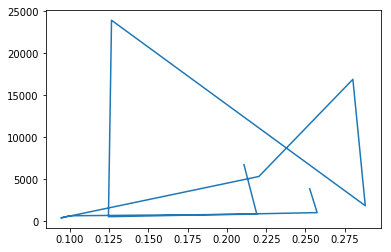

In [93]:
plt.pyplot.plot(COMPOUND_13_IOU,COMPUND_13_error)

<h2 style="color:#BF360C">PRESICION MEDIA</h2>

In [97]:
csv_test.loc[11:21]["PRECISION"], np.mean(csv_test.loc[11:21]["PRECISION"].values)

(11    0.795886
 12    0.775962
 13    0.436790
 14    0.575162
 15    0.788619
 16    0.743866
 17    0.676365
 18    0.458278
 19    0.540872
 20    0.705179
 21    0.710345
 Name: PRECISION, dtype: float64, 0.6552112258681645)

<h2 style="color:#BF360C">IUO MEDIA</h2>

In [199]:
pruebas

,PRUEBA,RED,EPOCH,BATCH_SIZE
0,1,FC-DenseNet56,50,1
1,2,FC-DenseNet56,70,1
2,3,Encoder-Decoder,70,1
3,4,Encoder-Decoder,70,2
4,5,Encoder-Decoder-Skip,70,1
5,6,Encoder-Decoder-Skip,70,2
6,7,FRRN-A,70,1
7,8,MobileUNet,70,1
8,9,MobileUNet,70,2
9,10,MobileUNet-Skip,70,1


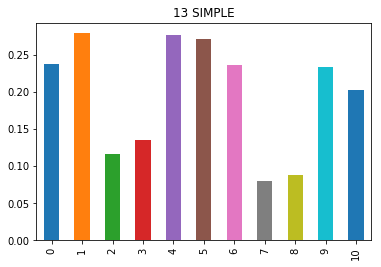

In [197]:
csv_test.loc[:10]["MEAN_IOU"].plot.bar(title="13 SIMPLE")

In [145]:
np.mean(csv_test.loc[:10]["MEAN_IOU"].values), np.std(csv_test.loc[:10]["MEAN_IOU"].values)

(0.19560460953989614, 0.07335997027976635)

In [153]:
csv_test.loc[csv_test.loc[:10]["MEAN_IOU"].idxmax()][2], csv_test.loc[:10]["MEAN_IOU"].idxmax()

('FC-DenseNet56', 1)

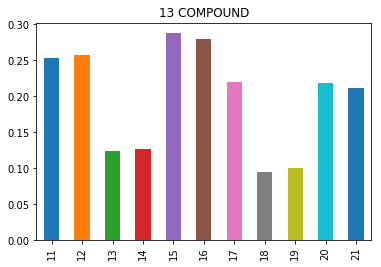

In [155]:
csv_test.loc[11:21]["MEAN_IOU"].plot.bar(title="13 COMPOUND")

In [156]:
np.mean(csv_test.loc[11:21]["MEAN_IOU"].values), np.std(csv_test.loc[11:21]["MEAN_IOU"].values)

(0.19760699718190686, 0.06969990663570784)

In [157]:
csv_test.loc[csv_test.loc[11:21]["MEAN_IOU"].idxmax()][2], csv_test.loc[11:21]["MEAN_IOU"].idxmax()

('Encoder-Decoder-Skip', 15)

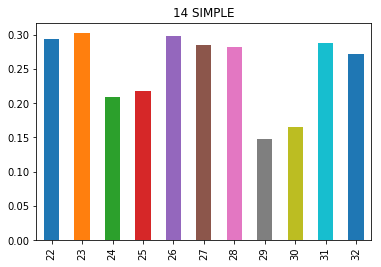

In [158]:
csv_test.loc[22:32]["MEAN_IOU"].plot.bar(title="14 SIMPLE")


In [159]:
np.mean(csv_test.loc[22:32]["MEAN_IOU"].values), np.std(csv_test.loc[22:32]["MEAN_IOU"].values)

(0.2508302695956907, 0.053349505393177496)

In [160]:
csv_test.loc[csv_test.loc[22:32]["MEAN_IOU"].idxmax()][2], csv_test.loc[22:32]["MEAN_IOU"].idxmax()

('FC-DenseNet56', 23)

0.25337890765926624

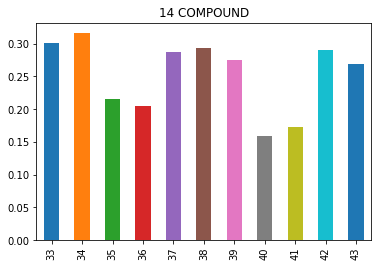

In [161]:
csv_test.loc[33:43]["MEAN_IOU"].plot.bar(title="14 COMPOUND")


In [162]:
np.mean(csv_test.loc[33:43]["MEAN_IOU"].values), np.std(csv_test.loc[33:43]["MEAN_IOU"].values)

(0.25337890765926624, 0.052478920977406515)

In [165]:
csv_test.loc[csv_test.loc[33:43]["MEAN_IOU"].idxmax()][2], csv_test.loc[33:43]["MEAN_IOU"].idxmax()

('FC-DenseNet56', 34)

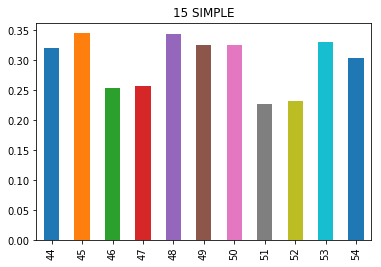

In [163]:
csv_test.loc[44:54]["MEAN_IOU"].plot.bar(title="15 SIMPLE")


In [164]:
np.mean(csv_test.loc[44:54]["MEAN_IOU"].values), np.std(csv_test.loc[44:54]["MEAN_IOU"].values)

(0.2962363915337449, 0.043074162639722004)

In [170]:
csv_test.loc[csv_test.loc[44:54]["MEAN_IOU"].idxmax()][2], csv_test.loc[44:54]["MEAN_IOU"].idxmax()

('FC-DenseNet56', 45)

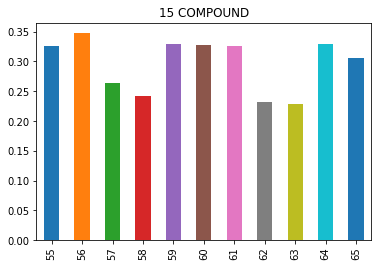

In [166]:
csv_test.loc[55:65]["MEAN_IOU"].plot.bar(title="15 COMPOUND")

In [167]:
 np.mean(csv_test.loc[55:65]["MEAN_IOU"].values),  np.std(csv_test.loc[55:65]["MEAN_IOU"].values)

(0.29621029745204075, 0.0429958843647462)

In [168]:
csv_test.loc[csv_test.loc[55:65]["MEAN_IOU"].idxmax()][2], csv_test.loc[55:65]["MEAN_IOU"].idxmax()

('FC-DenseNet56', 56)

In [169]:
print("Peor RED")
csv_test.loc[7][2], csv_test.loc[8][2]

Peor RED


('MobileUNet', 'MobileUNet')

In [181]:
iuo_fc_den = [csv_test.loc[i]["MEAN_IOU"] for i in [1, 12, 23, 34,45, 56]]
print(iuo_fc_den)
iuo_fc_den[1] - iuo_fc_den[0], iuo_fc_den[3] - iuo_fc_den[2], iuo_fc_den[5] - iuo_fc_den[4]

[0.27895862748100736, 0.25744381136932665, 0.3023016352681203, 0.3162539702981586, 0.34508586015468234, 0.34783605595694456]


(-0.021514816111680712, 0.013952335030038288, 0.002750195802262212)

<h2 style="color:#BF360C">IOU POR CLASE </h2>

In [146]:
# FUNCION DEL FRAMEWORK
def compute_mean_iou(pred, label):

    unique_labels = np.unique(label)
    num_unique_labels = len(unique_labels)
    iou_per_clase = np.zeros(7)

 
    
    I = np.zeros(num_unique_labels)
    U = np.zeros(num_unique_labels)

  
    for index, val in enumerate(unique_labels):
        pred_i = pred == val
        
        label_i = label == val

        I[index] = float(np.sum(np.logical_and(label_i, pred_i)))
        U[index] = float(np.sum(np.logical_or(label_i, pred_i)))
        iou_per_clase[int(val)] = I[index]/U[index]

    mean_iou = np.mean(I / U)
    return iou_per_clase


In [141]:
pred_3d = io.imread(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/60_pred.png")
gt_3d = io.imread(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/60_gt.png")
pred_2d = hp.get_target_matrix(pred_3d)
gt_2d = hp.get_target_matrix(gt_3d)

compute_mean_iou(pred_2d, gt_2d)

[0. 1. 2. 5.]


array([0.99986228, 0.14285714, 0.62983425, 0.        , 0.        ,
       0.        , 0.        ])

In [157]:
ZOOMS = ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]
PRUEBAS = [1,2,3,4,5,6,7,8,9,10,11]

dict_per = {
    "ZOOM":[],
    "PRUEBA":[],
    "IOU_ESTRATO_1":[],
    "IOU_ESTRATO_2":[],
    "IOU_ESTRATO_3":[],
    "IOU_ESTRATO_4":[],
    "IOU_ESTRATO_5":[],
    "IOU_ESTRATO_6":[],
    "IOU_NO_DEFINIDO":[],
    }

for ZOOM in ZOOMS:
    for PRUEBA in PRUEBAS:
        files = os.listdir("./Resultados/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/")
        count_files = 0
        total_iou = np.array([0] * 7)
        
        for file in files:
            if "pred" in file:
                pred_3d = io.imread(PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/"+file)
                gt_3d = io.imread(PATH_PRUEBAS+"/"+ZOOM+"/prueba_"+str(PRUEBA)+"/Val/"+file.replace("pred","gt"))
                
                pred_2d = hp.get_target_matrix(pred_3d)
                gt_2d = hp.get_target_matrix(gt_3d)
                count_files = count_files + 1
               
                total_iou = total_iou + compute_mean_iou(pred_2d, gt_2d)
        total_iou = total_iou/count_files
        
        dict_per["ZOOM"].append(ZOOM)
        dict_per["PRUEBA"].append(PRUEBA)
        dict_per["IOU_ESTRATO_1"].append(total_iou[1])
        dict_per["IOU_ESTRATO_2"].append(total_iou[2])
        dict_per["IOU_ESTRATO_3"].append(total_iou[3])
        dict_per["IOU_ESTRATO_4"].append(total_iou[4])
        dict_per["IOU_ESTRATO_5"].append(total_iou[5])
        dict_per["IOU_ESTRATO_6"].append(total_iou[6])
        dict_per["IOU_NO_DEFINIDO"].append(total_iou[0])

In [158]:
pd.DataFrame(data=dict_per).to_csv("./Resultados/IoU_per_class.csv")

In [5]:
iou_per_class = pd.read_csv("./Resultados/IoU_per_class.csv")
iou_per_class.head()

,Unnamed: 0,ZOOM,PRUEBA,IOU_ESTRATO_1,IOU_ESTRATO_2,IOU_ESTRATO_3,IOU_ESTRATO_4,IOU_ESTRATO_5,IOU_ESTRATO_6,IOU_NO_DEFINIDO
0,0,13_SIMPLE,1,0.008803,0.260389,0.376734,0.013065,0.001750,0.0,0.873695
1,1,13_SIMPLE,2,0.022246,0.310374,0.469174,0.113397,0.008644,0.0,0.884053
2,2,13_SIMPLE,3,0.009702,0.146833,0.169166,0.024350,0.000000,0.0,0.398201
3,3,13_SIMPLE,4,0.009238,0.127104,0.224202,0.014557,0.000000,0.0,0.489658
4,4,13_SIMPLE,5,0.123270,0.291502,0.412733,0.083708,0.001064,0.0,0.875524


In [13]:
iou_per_class["IOU_ESTRATO_1"].max(), iou_per_class["IOU_ESTRATO_1"].idxmax()

(0.17445176329946205, 16)

In [14]:
iou_per_class["IOU_ESTRATO_2"].max(), iou_per_class["IOU_ESTRATO_2"].idxmax()

(0.31037416164854065, 1)

In [15]:
iou_per_class["IOU_ESTRATO_3"].max(), iou_per_class["IOU_ESTRATO_3"].idxmax()

(0.4691740770368301, 1)

In [16]:
iou_per_class["IOU_ESTRATO_4"].max(), iou_per_class["IOU_ESTRATO_4"].idxmax()

(0.15774932614555254, 6)

In [17]:
iou_per_class["IOU_ESTRATO_5"].max(), iou_per_class["IOU_ESTRATO_5"].idxmax()

(0.05794396602327096, 34)

In [18]:
iou_per_class["IOU_ESTRATO_6"].max(), iou_per_class["IOU_ESTRATO_6"].idxmax()

(0.024046754996650144, 50)

In [20]:
iou_per_class["IOU_NO_DEFINIDO"].max(), iou_per_class["IOU_NO_DEFINIDO"].idxmax()

(0.9919641402471634, 44)

In [36]:
std = [iou_per_class.iloc[i][3:].std() for i in range(66)]
min(std), std.index(min(std))

(0.120013087176991, 7)

In [37]:
iou_per_class.iloc[7]

Unnamed: 0                   7
ZOOM                 13_SIMPLE
PRUEBA                       8
IOU_ESTRATO_1         0.018496
IOU_ESTRATO_2         0.116595
IOU_ESTRATO_3        0.0470909
IOU_ESTRATO_4      0.000433276
IOU_ESTRATO_5                0
IOU_ESTRATO_6                0
IOU_NO_DEFINIDO       0.327858
Name: 7, dtype: object

In [44]:
std[56]

0.3455398859783537

<h2 style="color:#BF360C">TIEMPO </h2>

In [132]:
times = []
for i in csv_train["RUN_TIME"]:
    times.append(int(i.split("hours")[0])*60*60 + int(i.split("hours")[1].split("minutes")[0])*60 + int(i.split("hours")[1].split("minutes")[1].split("seconds")[0]))

csv_test.iloc[np.array(times[0:11]).argmin()][2], csv_test.iloc[np.array(times[0:11]).argmax()][2]

('MobileUNet-Skip', 'FRRN-A')

In [133]:
csv_test.iloc[np.array(times[12:22]).argmin()][2], csv_test.iloc[np.array(times[12:22]).argmax()][2]

('MobileUNet', 'Encoder-Decoder')

In [134]:
csv_test.iloc[np.array(times[23:33]).argmin()][2], csv_test.iloc[np.array(times[23:33]).argmax()][2]

('MobileUNet', 'Encoder-Decoder')

In [135]:
csv_test.iloc[np.array(times[34:44]).argmin()][2], csv_test.iloc[np.array(times[34:44]).argmax()][2]

('MobileUNet-Skip', 'FC-DenseNet56')

In [136]:
csv_test.iloc[np.array(times[45:55]).argmin()][2], csv_test.iloc[np.array(times[45:55]).argmax()][2]

('MobileUNet', 'Encoder-Decoder-Skip')

In [137]:
csv_test.iloc[np.array(times[56:66]).argmin()][2], csv_test.iloc[np.array(times[56:66]).argmax()][2]

('MobileUNet', 'Encoder-Decoder-Skip')